In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nose.tools import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import make_scorer
from scipy import stats
import seaborn as sns

In [11]:
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_30a12a3a60a04755bf3127989f2bafb5 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Hfh454rWefeONSbDE5MvB_ZadUPgbDbRnmi-TqAbdFtZ',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_30a12a3a60a04755bf3127989f2bafb5.get_object(Bucket='predictinglifeexpectancy-donotdelete-pr-ceilchi3ghrwwh',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
life_data= pd.read_csv(body)
life_data.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [12]:
life_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [13]:
life_data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [14]:
status = pd.get_dummies(life_data.Status)
life_data = pd.concat([life_data, status], axis = 1)
life_data = life_data.drop(['Status'], axis=1)
life_data.rename(columns = {'Deloping' : '0', 'Developed' : 1})

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,1,Developing
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1
5,Afghanistan,2010,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,...,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2,0,1
6,Afghanistan,2009,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,...,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9,0,1
7,Afghanistan,2008,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,...,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7,0,1
8,Afghanistan,2007,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,...,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4,0,1
9,Afghanistan,2006,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,...,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1,0,1


In [15]:
life_data = life_data.groupby('Country').mean()
life_data.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2007.5,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,...,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250,0,1
Albania,2007.5,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,...,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750,0,1
Algeria,2007.5,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,...,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250,0,1
Angola,2007.5,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,...,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375,0,1
Antigua and Barbuda,2007.5,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,...,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375,0,1


# exploratory data analysis

Text(0, 0.5, 'Life expectancy')

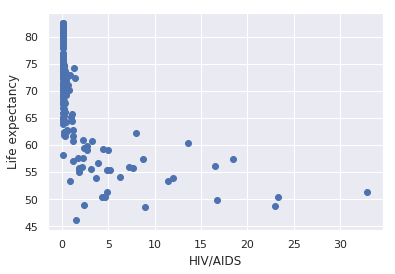

In [16]:
plt.scatter(life_data[' HIV/AIDS'], life_data['Life expectancy '])
plt.xlabel('HIV/AIDS')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

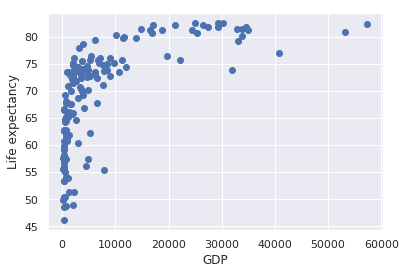

In [17]:
plt.scatter(life_data.GDP, life_data['Life expectancy '])
plt.xlabel('GDP')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

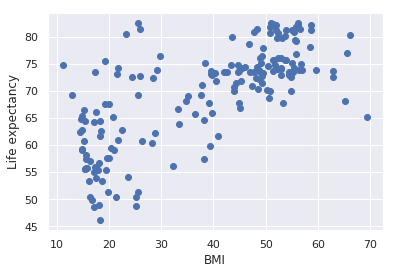

In [18]:
plt.scatter(life_data[' BMI '], life_data['Life expectancy '])
plt.xlabel('BMI')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

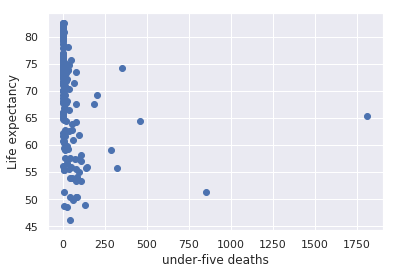

In [19]:
plt.scatter(life_data['under-five deaths '], life_data['Life expectancy '])
plt.xlabel('under-five deaths')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

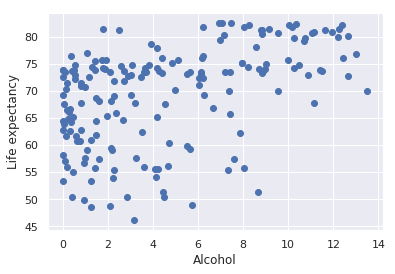

In [20]:
plt.scatter(life_data['Alcohol'], life_data['Life expectancy '])
plt.xlabel('Alcohol')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

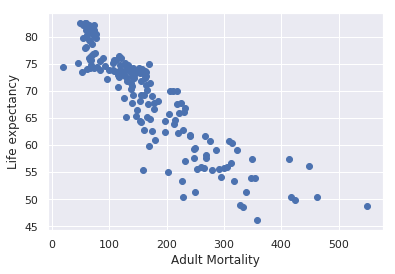

In [21]:
plt.scatter(life_data['Adult Mortality'], life_data['Life expectancy '])
plt.xlabel('Adult Mortality')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

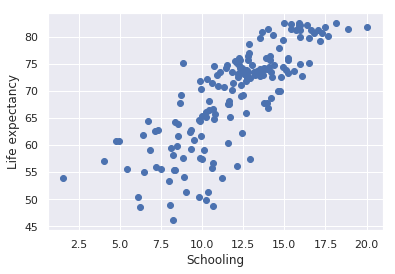

In [22]:
plt.scatter(life_data['Schooling'], life_data['Life expectancy '])
plt.xlabel('Schooling')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

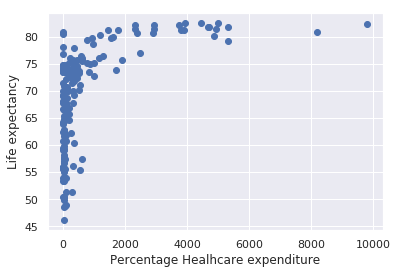

In [23]:
plt.scatter(life_data['percentage expenditure'], life_data['Life expectancy '])
plt.xlabel('Percentage Healhcare expenditure')
plt.ylabel('Life expectancy')

Using the scatter plot we plot the Life Expectancy against some other varyables to see if there is any correlation between them.
There seem to be a positive correlation between The Percentage of Healthcare Expenditure, Schooling, GDP and BMI and Life Expectancy, while there is a negative one between Adult Mortality, AIDS and Life Expectancy,there does not seem to have any correlation between Alcohol, under 5 years – old deaths and Life Expectancy.

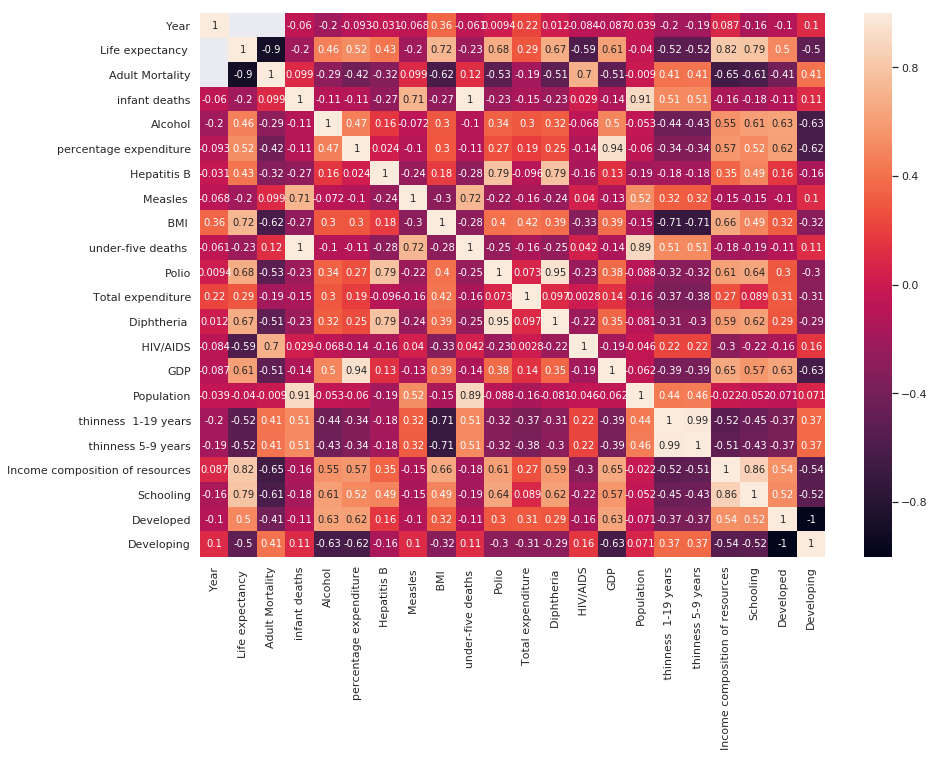

In [24]:
plt.figure(figsize = (14, 10))
sns.heatmap(life_data.corr(), annot = True)

Now we will plot the correlation matrix visulizing it with a heatmap. The legend tells that the warmer colors show higher and positive correlation, while the colder low or negative.
There is a very high correlation between thinness of 5-9 year-old and that of 1-19 year-old. Also between population and infant deaths, under 5 deaths, another is between schooling and income composition of resources. On the other hand Life expectancy and Adult Mortality are very highly negatively correlated.

# Preprocessing the data

The raw data is not suitable for us to start building a model so some preprocessing will be done. First the Status of the country is turned into numberical with the get_dummies function, so we get 2 new columns. The original column is being dropped. Second the data is being grouped by the country and we find the mean values during the 2000 – 2015 year period.
Then the Life expectancy column is removed to form the life_labels variable or the output, and the rest is stored as the life_features variable. Now we consider that we have some null values in the table, the isnull function has been used to find the with the boolean True. Below that the number of null values are displayed in each separate column. It is mostly situated in the Population and GDP columns.
Now the missing values are filled with the mean of its respective column. This will create some distortions, but the other option in removing parts of the table will shrink the data so it will be avoided here because the number of rows is not that high. The final shape for the life_features is 193 rows to 20 columns. Finally considering the large differences in the values of the columns, there will be some scaling with the MinMaxScaler function.
Now we will split the data into a training part of 70% and a testing of 30%. Cross validation will be initialized with the creation of 5 fold split.

In [25]:
life_labels = life_data['Life expectancy ']
life_features = life_data.drop('Life expectancy ', axis = 1)
life_features.isnull().head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Albania,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Algeria,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Angola,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Antigua and Barbuda,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [26]:
life_features.isnull().sum()

Year                                0
Adult Mortality                    10
infant deaths                       0
Alcohol                             2
percentage expenditure              0
Hepatitis B                         9
Measles                             0
 BMI                                4
under-five deaths                   0
Polio                               0
Total expenditure                   2
Diphtheria                          0
 HIV/AIDS                           0
GDP                                30
Population                         48
 thinness  1-19 years               4
 thinness 5-9 years                 4
Income composition of resources    17
Schooling                          13
Developed                           0
Developing                          0
dtype: int64

In [27]:
life_labels.isnull().sum()

10

In [28]:
life_features.fillna(value = life_features.mean(), inplace = True)

In [30]:
life_labels.fillna(value = life_labels.mean(), inplace = True)


In [36]:
stats.describe(life_features[1:])

DescribeResult(nobs=192, minmax=(array([2.00750000e+03, 1.87500000e+01, 0.00000000e+00, 1.00000000e-02,
       0.00000000e+00, 8.00000000e+00, 0.00000000e+00, 5.20000000e+00,
       0.00000000e+00, 9.00000000e+00, 1.64666667e+00, 9.00000000e+00,
       1.00000000e-01, 1.36183210e+02, 2.92000000e+02, 1.00000000e-01,
       1.00000000e-01, 1.31687500e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00]), array([2.01300000e+03, 5.50062500e+02, 1.36668750e+03, 1.34973333e+01,
       9.80181038e+03, 9.90000000e+01, 6.58579375e+04, 8.73000000e+01,
       1.81250000e+03, 9.90000000e+01, 1.72400000e+01, 9.90000000e+01,
       3.29437500e+01, 5.73628746e+04, 4.21467691e+08, 2.71000000e+01,
       2.79437500e+01, 9.31437500e-01, 2.00375000e+01, 1.00000000e+00,
       1.00000000e+00])), mean=array([2.00778646e+03, 1.64253396e+02, 2.85745443e+01, 4.46296480e+00,
       7.12321318e+02, 7.85909681e+01, 2.30174674e+03, 3.96797168e+01,
       3.96419271e+01, 8.26078218e+01, 6.01668050e+00, 8.23

In [37]:
min_max_scaler = MinMaxScaler()
life_features = min_max_scaler.fit_transform(life_features)
life_features

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.00000000e+00, 4.71121045e-01, 5.72552248e-02, ...,
        4.09856519e-01, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 4.95235855e-02, 5.03041112e-04, ...,
        6.05739239e-01, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.68333137e-01, 1.48625783e-02, ...,
        6.34435434e-01, 0.00000000e+00, 1.00000000e+00],
       ...,
       [0.00000000e+00, 3.63369015e-01, 2.88105364e-02, ...,
        4.24516532e-01, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 6.31572756e-01, 2.44660905e-02, ...,
        5.59575795e-01, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 8.34960593e-01, 1.94356793e-02, ...,
        4.90330630e-01, 0.00000000e+00, 1.00000000e+00]])

In [38]:
life_features_train, life_features_test, life_labels_train, life_labels_test = train_test_split(
life_features, life_labels, train_size = 0.7, test_size = 0.3)

# Linear Regression and additions

In [39]:
linear_model = LinearRegression()
linear_model.fit(life_features_train, life_labels_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
print('R_square score on the training: %.2f' % linear_model.score(life_features_train, life_labels_train))

R_square score on the training: 0.94


In [41]:
linear_model_predict = linear_model.predict(life_features_test)

In [42]:
print('Coefficients: \n', linear_model.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(life_labels_test, linear_model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(life_labels_test, linear_model_predict))
print('R_square score: %.2f' % r2_score(life_labels_test, linear_model_predict))

Coefficients: 
 [ -1.25390514 -26.05516442  72.11518032   1.85110287   2.91001236
  -2.32959938   3.23860704   5.02405914 -86.51810409  -3.8533377
   3.44693923  10.58727399  -4.95191409  -0.17747526   9.17872334
  -4.81145775   6.29118796   7.75902547   3.98743423  -0.14748227
   0.14748227]
Mean squared error: 7.95
Mean absolute error: 2.20
R_square score: 0.85


Several algorithms will be tried out. First the classical linear regression.
The model is fitted first on the trained data the R square is 0.92 on the training data.Later its R square is checked on the testing data. The score is 87 % in the iteration of writing. We also calculate the MAE (the modulus between the predicted and the real value) at 2.32 and the MSE (the same only put to the power of 2) at 9.8. Now we will try to have some changes to the initial model. We will use both the properties of the Ridge regression and the Lasso and eventually the ElasticNet to see if the score can be improved.

In [46]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(Ridge(),
              param_grid={'alpha': range(0, 10), 'max_iter' : [10, 100, 1000]},
              scoring=scoring, cv=5, refit=True)
grid_cv.fit(life_features_train, life_labels_train)
print("Best Parameters: " + str(grid_cv.best_params_))
result = grid_cv.cv_results_
print("R^2 score on training data: %.2f" %grid_cv.score(life_features_train, life_labels_train))
print("R^2 score: %.2f"
      % r2_score(life_labels_test, grid_cv.best_estimator_.predict(life_features_test)))
print("Mean squared error: %.2f"
      % mean_squared_error(life_labels_test, linear_model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(life_labels_test, linear_model_predict))

Best Parameters: {'alpha': 1, 'max_iter': 10}
R^2 score on training data: 0.93
R^2 score: 0.84
Mean squared error: 7.95
Mean absolute error: 2.20


The Ridge Regression uses L2 regularization to minimize the weights of the coefficients, this is controlled with the hyperparameter alpha. Increasing the value of alpha decreases the weights of the coefficients.
We performed a grid search with cross-validation on the grid regression with alpha varying between 0 and 10 and having 3 max iterations of 10, 100 and 1000. Finally the best parameters here are alpha = 1, and max iterations = 10. The R square on the training data is 90% compared to 92 % on the standard linear model There is some improvement of the R square on the test data statistic 91% vs 87% the errors stayed the same. The MAE is 1.83 better and MSE is 6.05 again lower the classic linear regression

In [48]:
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(Lasso(),
              param_grid={'alpha': range(0, 10), 'max_iter' : [10, 100, 1000]},
              scoring=scoring, cv=5, refit=True)
grid_cv.fit(life_features_train, life_labels_train)
print("Best Parameters: " + str(grid_cv.best_params_))
result = grid_cv.cv_results_
print("R^2 score on training data: %.2f" % grid_cv.score(life_features_train, life_labels_train))
print("R^2 score: %.2f"
      % r2_score(life_labels_test, grid_cv.best_estimator_.predict(life_features_test)))
print("Mean squared error: %.2f"
      % mean_squared_error(life_labels_test, linear_model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(life_labels_test, linear_model_predict))

Best Parameters: {'alpha': 0, 'max_iter': 10}
R^2 score on training data: 0.94
R^2 score: 0.84
Mean squared error: 7.95
Mean absolute error: 2.20


The Lasso Regression uses the L1 regularization which reduces some coefficent weights to zero. Again the regularization is controlled with aplha, decreasing it reduces the weights, also at the same time the max iterations hyperparameter needs to be increased.
The best parameters for the Lasso Regression are alpha = 0, and max iterations set to 100. The R square is a little higher at 92 % on the training data and 92 % on the test data the errors continue to stay the same as the Ridge regression.

In [49]:
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(ElasticNet(),
              param_grid={'alpha': range(0, 10), 'max_iter' : [10, 100, 1000], 'l1_ratio' : [0.1, 0.4, 0.8]},
              scoring=scoring, cv=5, refit=True)
grid_cv.fit(life_features_train, life_labels_train)
print("Best Parameters: " + str(grid_cv.best_params_))
result = grid_cv.cv_results_
print("R^2 score on training data: %.2f" % grid_cv.score(life_features_train, life_labels_train))
print("R^2 score: %.2f"
      % r2_score(life_labels_test, grid_cv.best_estimator_.predict(life_features_test)))
print("Mean squared error: %.2f"
      % mean_squared_error(life_labels_test, linear_model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(life_labels_test, linear_model_predict))

Best Parameters: {'alpha': 0, 'l1_ratio': 0.1, 'max_iter': 10}
R^2 score on training data: 0.94
R^2 score: 0.84
Mean squared error: 7.95
Mean absolute error: 2.20


The ElasticNet combines both L1 and L2 regularization of the previous regression types.
Finally the grid search concerning ElasticNet shows that it performs as well as the Lasso regression so far with alpha = 0, max iterations = 100 and the L1 ration set at 0.1. The R square and the errors remain the same as the Lasso Regression

# Linear Regression with Polynomial Features

The Polynomial Features function has been used to get the interactions of the input variables only to the power of 2

In [50]:
quad_feature_transformer = PolynomialFeatures(2, interaction_only = True)
quad_feature_transformer.fit(life_features_train)
life_features_train_quad = quad_feature_transformer.transform(life_features_train)
life_features_test_quad = quad_feature_transformer.transform(life_features_test)

In [51]:
poly_model_quad = LinearRegression()
poly_model_quad.fit(life_features_train_quad, life_labels_train)
accuracy_score_quad = poly_model_quad.score(life_features_train_quad, life_labels_train)
print(accuracy_score_quad)

1.0


The Linear Regression is being tested on the training data with the new Polynomial Features, the accuracy is 1, meaning the model has learned all the data. An prediction for the life_features_test_quad variable has been made.

In [52]:
poly_model_quad_predict = poly_model_quad.predict(life_features_test_quad)

In [53]:
print("Mean squared error: %.2f"
      % mean_squared_error(life_labels_test, poly_model_quad_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(life_labels_test, poly_model_quad_predict))
print('R_square score: %.2f' % r2_score(life_labels_test, poly_model_quad_predict))

Mean squared error: 195.33
Mean absolute error: 8.41
R_square score: -2.64


All the errors are significantly higher then the privious models, and the R square is in this case negative (this happens only in sklearn). This is the worst performing model for now.

# Decision Tree Regression

In [55]:
decision_tree_model = DecisionTreeRegressor()
decision_tree_fit = decision_tree_model.fit(life_features_train, life_labels_train)
decision_tree_score = cross_val_score(decision_tree_fit, life_features_train, life_labels_train, cv = 5)
print("mean cross validation score: %.2f"  % np.mean(decision_tree_score))
print("score without cv: %.2f" % decision_tree_fit.score(life_features_train, life_labels_train))
print("R^2 score on the test data %.2f"% r2_score(life_labels_test, decision_tree_fit.predict(life_features_test)))

mean cross validation score: 0.86
score without cv: 1.00
R^2 score on the test data 0.72


Now we will try the Decision Tree Regression. Cross Validation has been performed
The R square on the training data is 1 meaning that the algorithm has learned the data by heart, with the cross validation the figure declines to 77% and using the test date we get 80%
Now we use the algorithm to predict the values of the life_features_test.

In [56]:
decision_tree_model_predict = decision_tree_model.predict(life_features_test)

In [57]:
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(DecisionTreeRegressor(),
              param_grid={'min_samples_split': range(2, 10)},
              scoring=scoring, cv=5, refit=True)
grid_cv.fit(life_features_train, life_labels_train)
grid_cv.best_params_
print("Best Parameters: " + str(grid_cv.best_params_))
result = grid_cv.cv_results_
print("R^2 score on training data: %.2f"  % grid_cv.best_estimator_.score(life_features_train, life_labels_train))
print("R^2 score: %.2f"
      % r2_score(life_labels_test, grid_cv.best_estimator_.predict(life_features_test)))
print("Mean squared error: %.2f"
      % mean_squared_error(life_labels_test, decision_tree_model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(life_labels_test, decision_tree_model_predict))

Best Parameters: {'min_samples_split': 6}
R^2 score on training data: 1.00
R^2 score: 0.78
Mean squared error: 15.21
Mean absolute error: 2.93


After performing grid search with minimun samples split in the range between 2 and 10 we get the best split of 3.
The R square on the training data is 98%, the algorithms has nearly leaned the data by hearth. On the test data we get R square of 81 %, the MAE is 2.71 and MSE is 16.59. This method is worse than the Elastic Net Regression

# Random Forest Regression

In [58]:
random_forest_model = RandomForestRegressor()
random_forest_fit = random_forest_model.fit(life_features_train, life_labels_train)
random_forest_score = cross_val_score(random_forest_fit, life_features_train, life_labels_train, cv = 5)
print("mean cross validation score: %.2f"
       % np.mean(random_forest_score))
print("score without cv: %.2f"
      % random_forest_fit.score(life_features_train, life_labels_train))
print("R^2 score on the test data %.2f"
      %r2_score(life_labels_test, random_forest_fit.predict(life_features_test)))

mean cross validation score: 0.93
score without cv: 0.99
R^2 score on the test data 0.84


Now we will use the Random Forest Regression
The alogorithm has learned 98% on the training data without cross validation and 88% with, the value is 92 % on the test data.

In [59]:
random_forest_model_predict = random_forest_model.predict(life_features_test)
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(RandomForestRegressor(),
              param_grid={'min_samples_split': range(2, 10)},
              scoring=scoring, cv=5, refit=True)
grid_cv.fit(life_features_train, life_labels_train)
grid_cv.best_params_
result = grid_cv.cv_results_
print("Best Parameters: " + str(grid_cv.best_params_))
result = grid_cv.cv_results_
print("R^2 score on training data: %.2f"  % grid_cv.best_estimator_.score(life_features_train, life_labels_train))
print("R^2 score: %.2f"
      % r2_score(life_labels_test, grid_cv.best_estimator_.predict(life_features_test)))
print("Mean squared error: %.2f"
      % mean_squared_error(life_labels_test, random_forest_model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(life_labels_test, random_forest_model_predict))

Best Parameters: {'min_samples_split': 4}
R^2 score on training data: 0.99
R^2 score: 0.86
Mean squared error: 8.65
Mean absolute error: 2.10


After performing grid search in the range 2 to 10 for the minimun samples split we get 2 for the split. The R square on the training is 98 % while on the test it is 91% and a MAE of 1.89 and MSE of 6.71.

# CONCLUSION

After comparing all the algorithms we can conclude the Lasso and the Elastic Net Regression offer which are the same:



Best Parameters: {‘alpha’: 0, ‘max_iter’: 10}


R square on the test data of 92%


MAE of 1.83


MSE of 6.05